# Homework 3

### This is the solution of:
* Tor Djupman
* Isac Östman
* Felix Svedberg

$$\newcommand{\dx}{\,\mathrm{d}x}
\newcommand{\ldb}{\left\llbracket}
\newcommand{\rdb}{\right\rrbracket}
\newcommand{\lp}{\left(}
\newcommand{\rp}{\right)}
\newcommand{\tn}{|\mspace{-1mu}|\mspace{-1mu}|}
\newcommand{\IR}{\mathbb{R}}
$$

## Problem 1 ($L^2$-projection)


Let $0 = x_0 < x_1 < x_2 < \ldots < x_{N} = 1$ be a partition of the interval
$I = (0,1)$ into $N$ subintervals of equal length $h=1/N$.  Moreover,
let $\{ \lambda_j\}_{j=0}^{N}$ be the set of nodal/hat basis functions of $V_h$
associated with the $N+1$ nodes $x_j$, $j = 0,1\ldots, N$, such that
The $L^2$-projection reads: find $P_hf\in V_h$ such that
$$
    \int_I(f - P_h f) v \dx = 0 \qquad\text{for all }v\in V_h
$$
We consider three different functions
* $f_1(x)=x\sin (3\pi x)$
* $f_2(x)=2-10x$
* $f_3(x)=x(1-x)$

**a)** Write a script ${\texttt {AssembleMassMatrix1D(x)}}$ that computes the mass matrix. 

**b)** Write a corresponding function $\texttt{AssembleLoadVector(x,f)}$ which computes 
the load vector for a given function $f$. Make sure that you can easily switch (for example by adding another input variable) out the quadrature
rule (Trapezoid and Simpson) to approximate the integrals $\int_{I} f \varphi_i \dx$

Convince yourself that your code is correct by computing the $L^2$ projection of the given functions, and observe that they look similar to the original function when plotting in the same figure (with enough mesh points). You do not need to document this.

**c)** Write a function $\texttt{ComputeErrorL2(x,Pf,f)}$ which computes the error in $L^2$ norm, 
$$\|P_h f-f \|=\sqrt{\int_0^1(P_h f-f)^2 dx}.$$
Hint: use the equivalent formula
$$\|P_h f-f \|=\sqrt{\sum_{i=1}^{N} \int_{x_{i-1}}^{x_{i}}(P_h f-f)^2 dx},$$
and approximate the integrals in each subinterval using Simpson's rule.

**d)** Test your code by computing the $L^2$-projection $P_h f\in V_h$ for the three given functions by using the
Trapezoidal rule to compute the load vector. Test with different $N$ values. Do the errors converge as expected? Why?

**e)** Repeat **d)** using Simpson's rule to compute the load vector. What do you find and why?

### Code Snippets

In [ ]:
def AssembleMassMatrix1D(x):
    # Number of intervals
    N = x.size-1
    # 1) Allocate and initiate matrix
    M = ...

    # 2) Compute volume contributions by iterating over 
    #    intervals I_0 to I_(N-1):
    for i in range(0,N):
        # Mesh  size
        h = ...
        # Compute local mass matrix
        M_loc = ...*np.array([[2, 1],[1, 2]])
        # Write local matrix into global
        M[i, i] += M_loc[0, 0]
        # Add three more matrix entries
        ...
        ...
        ...
    
    return M

In [ ]:
def AssembleLoadVector1D(x, f):
    # Number of intervals
    N = ...
    # 1) Allocate and initiate global load vector
    b = ...
    # 2) Compute volume contributions by iterating over intervals 
    #    I_1 to I_N:
    for i in range(1,N+1):
        # Mesh  size
        h = ...
        # Element load vector
        b_loc = np.zeros(2)
        # Apply quadrature rule to int f phi_{i-1} and int f phi_{i}
        # Trapezoidal
        b_loc[0] = f(x[i-1])*h/2
        b_loc[1] = ...
        # Simpson
        # m = ...
        # b_loc[0] = ...
        # b_loc[1] = ...
        
        # Add to global vector
        b[i-1] += ...
        b[i] += ...

    return b

In [ ]:
def ComputeErrorL2(x,Pf,f):
    # Pf is an arracy consisting of the L2 projection evaluated on the mesh points
    # f is a function for f1, f2 or f3
    N = Pf.size-1
    err = 0
    for i in range(N):
        h = x[i+1]-x[i]
        Pfl = ... # L2 projection value at x[i]
        Pfr = ... # L2 projection value at x[i+1]
        fl = ... # function value at x[i]
        fr = ... # function value at x[i+1]
        m = (x[i]+x[i+1])/2
        err = err+ ... # Simpsons rule
        #print(err)
    return ... # hint: ... is not just err

## Problem 2  (The variational/weak formulation of Poisson's equation)

Note: Problem 2 is a theoretical exercise. You are not required to write any programming code.

**a)**
Derive the weak formulation for the steady-state advection-diffusion equation with variable coefficents, 
\begin{align*}
- (a(x)u(x)')' + c(x)u(x) = f \quad \text{in } I = (0,1)
\\
u(0) = 0, \quad u'(1) = 10,
\end{align*}
for two smooth functions $a(x)$ and $c(x)$ satisfying $a(x) \geqslant a_0 > 0$
and $c(x) \geqslant 0$.

**b)**
Derive a finite element method in suitable function spaces. 

**c)**
Derive the linear system for the above finite element method. 

## Problem 3 (A 1D Finite Element Solver)

**a**) For $u(x) = x + \cos(2\pi x)$, compute a right-hand side $f$ and boundary values $g_R$, $g_N$
such that $u(x)$ solves the two-point boundary value problem on $I = [0,1]$ given by
\begin{gather}
-u''= f, \quad 0<x<1, 
\\
u'(0)=-g_N, \quad u'(1)= (g_R - u(1))
\end{gather}
a Neumann boundary condition on the left end point and a Robin boundary condition on the right end point.

**b)** Write down the weak form and then the finite element method, and be precise with the function spaces. Implement a finite element solver for this two-point boundary problem. 
Use uniform meshes with $h=1/N$ for $N = 4, 8, 16, 32, 64, 128$ and
compare the numerical solution $u_h$ with the exact solution $u(x)$
by plotting $u_h$ for $N = 4, 8, 16, 128$ and $u$ into the same figure.

**c)** Define the energy norm $\tn v \tn$ for $v \in V$ for this problem. Assuming that you can integrate the
right hand side $\int_I f v_h$ **exactly** for $v \in V_h \subset V$, show that the energy error satisfies
\begin{align*} 
 \tn u-u_h\tn^2=\tn u\tn^2-\tn u_h\tn^2     \quad\quad\quad\quad\quad\quad(1)
\end{align*}
by exploiting the Galerkin orthogonality. Hint: there is a similar identity in the lecture notes. You may follow the same procedure for the proof, but note that the energy norm here has a different expression.

Next, show that the following identity holds: 
\begin{align*}
\tn u_h\tn^2 =  U^T A U              \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad (2)
\end{align*}
where $U$ is the  coefficient vector corresponding to $u_h = \sum_{i=0}^{N} U_i \varphi_i$ and $A$ is the stiffness matrix for the problem at hand (including the contribution from the boundary).

**d)** For the given $N$ in b), compute the errors in the follwoing norms

* a) The maximum norm 
* b) The energy norm  

present the results in log-log plots (error versus $h$) and specify the convergence rate. Do they converge as expected?

Hint: use (1) to compute the error in the energy norm (be careful with the squares). For the first term in the right-hand side of (1), you can use a composite quadrature. For the second term in the right-hand side of (1), you can use the formula given in (2). 

Hint: (1) only holds if the load vector is computed exactly. When you approximate the integrals in the load vector, use a very accurate quadrature. 


__ANSWERS:__
$g_N = -1$, $g_R = 3$, $ f = 4 \pi^2 \cos (2 \pi x) $

__a)__ We have that $u(x) = x + \cos (2 \pi x)$, thus
\begin{align*}
    f &= -u'' = 4\pi^2 \sin (2\pi x), \quad 0< x < 1 \\
    g_N &= -u'(0) = 1 - 2 \pi \sin (2 \pi \times 0) = 1 \\
    g_R &= u'(1) + u(1) = 1 + 1 + 1 = 3
\end{align*}

__b)__ Weak form:

Find $u \in V_0$ such that,
$$
    \int_I u' v' dx + u(1) v(1) = \int_I f v dx + g_R v(1) + g_N v(0), \quad \forall v \in V_0 \quad \quad (1)
$$
where,
$$
    V_0 = \{v : \| v \|_{L^2(I)} < \infty, \, \| v' \|_{L^2(I)} < \infty \}
$$

Finite element:

Let $I_i = [\ x_{i-1}, x_i ]\ $, where $i = 1, 2, ..., N$. Find $u_h \in V_{h,0}$ such that,
$$
    \int_{I} u'_h v'_h dx + u_h(1) v_h(1) = \int_I f v_h dx + g_R v_h(1) + g_N v_h(0), \quad \forall v_h \in V_{h,0}
$$
where,
$$
    V_{h,0} = \{ v : v \in C^0(I), \, v |_{I_i} \in P_1(I_i) \quad \text{with} \quad i = 1, ..., N \}.
$$
Which is equivalent to,
$$
    \int_{I} u'_h \phi'_i dx + u_h(1) \phi_i(1) = \int_I f \phi_i dx + g_R \phi_i(1) + g_N \phi_i(0)
$$
where,
\begin{align*}
    u_h &= \sum^N_{j=0} \xi_j \phi_j(x) \\
    \phi_k(x) &= 
    \left\{
    \begin{array}{cc}
     \frac{x - x_{k-1}}{h_i}, & x \in I_i \\
     \frac{x_{k+1} - x}{h_i}, & x \in I_{i+1} \\
     0, & \text{otherwise}
    \end{array}
    \right.
\end{align*}

An analytical versus numerical plot can be seen below. There, it can be seen that the numerical result converges to the analytical result for larger N.

__c)__ We define the energy norm, from Eq. (1), as
$$
    ||| v ||| = \left[ \int_I (v')^2 dx + v(1)^2 \right]^{1/2}
$$
Thus, we can show that,
$$
    ||| u - u_h |||^2 = ||| u |||^2 - ||| u_h |||^2
$$
by using the Galerkin orthogonality, i.e. the error, $(u - u_h)$, is orthogonal to all functions in $V_{h,0}$. This also holds for the derivatives. Therefore,
\begin{align*}
    ||| u - u_h |||^2 &= \int_I (u' - u'_h)^2 dx + \left( u(1) - u_h(1) \right)^2 = \int_I (u' - u'_h)u' dx - \int_I (u' - u'_h) u'_h dx + \left( u(1) - u_h(1) \right)u(1) - \left( u(1) - u_h(1) \right) u_h(1) = \\ 
    &\overset{(i)}{=} \int_I (u')^2 dx - \int_I u' u'_h dx + \int_I (u' - u'_h) u'_h dx + u(1)^2 - u(1)u_h(1) + \left( u(1) - u_h(1) \right) u_h(1) = \\
    &= \int_I (u')^2 dx + u(1)^2 - \int_I (u_h')^2 dx - u_h(1)^2 = ||| u |||^2 - ||| u_h |||^2.
\end{align*}
In (i) we used that $(u' - u'_h) u'_h = \left( u(1) - u_h(1) \right) u_h(1) = 0$, i.e. Galerkin's orthogonality theorem.

Using that $u_h = \sum^N_{i=0} U_i \phi_i$ and that $A_{ij} = \int_I \phi'_i(x) \phi'_j(x) dx + \phi_i(1) \phi_j(1)$ we get that,
\begin{align*}
    U^T A U = \sum^N_{i=0} \sum^N_{j=0} U_i A_{ij} U_j = \sum^N_{i=0} \sum^N_{j=0} \left[ \int_I U_i \phi'_i(x) U_j \phi'_j(x) dx + U_i \phi'_i(1) U_j \phi'_j(1) \right] = \int_I (u'_h)^2 dx + u_h(1)^2 = ||| u_h |||^2
\end{align*}
Thus, $ ||| u_h |||^2 = U^T A U$.

__d)__ From the final figure below, we see that the energy norm has a convergence rate of $\mathcal{O}(h)$, and the max norm $\mathcal{O}(h^2)$. According to the theory, we expect the energy norm to exhibit first-order convergence. This is from the Apriori error estimate theorem, given that the boundary terms do not change the convergence rates. 

For the max norm, we expect the error not to scale better than the composite quadrature used to calculate $u_h$. Because Simpsons method is used, and that Simpsons scales like $\mathcal{O}(h^2)$, the max norm of the error should be limited by $\mathcal{O}(h^2)$. However, other factors could play a role here.


In [2]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

In [3]:
def AssembleStiffnessMatrix1D(x):
    # Number of intervals
    N = x.size-1
    # 1) Allocate and initiate matrix
    A = np.zeros((N+1, N+1))

    # 2) Compute volume contributions by iterating over 
    #    intervals I_0 to I_(N-1):
    for i in range(0,N):
        # Mesh  size
        h = x[i+1]-x[i]
        # Compute local stiffness matrix
        A_loc = 1/h*np.array([[1, -1],[-1, 1]])
        # Write local matrix into global
        A[i, i] += A_loc[0, 0]
        # Add three more matrix entries
        A[i, i+1] += A_loc[0, 1]
        A[i+1, i] += A_loc[1, 0]
        A[i+1, i+1] += A_loc[1, 1]
    
    # 3) Compute natural boundary contributions
    # Add Robin on the right
    A[N, N] += 1
    
    return A

In [4]:
def AssembleLoadVector1D(x, f, g_N, g_R):
    # Number of intervals
    N = x.size-1
    # 1) Allocate and initiate global load vector
    b = np.zeros(N+1)
    # 2) Compute volume contributions by iterating over intervals 
    #    I_0 to I_(N-1):
    for i in range(0,N):
        h = x[i+1] - x[i]
        b_loc = np.zeros(2)

        m = (x[i+1] + x[i])/2
        b_loc[0] = h/6*(f(x[i]) + 2*f(m))
        b_loc[1] = h/6*(f(x[i+1]) + 2*f(m))

        # Add to global vector
        b[i] += b_loc[0]
        b[i + 1] += b_loc[1]

    # 3) Incorporate boundary values
    # Neumann
    b[0] += g_N
    # Robin
    b[N] += g_R

    return b

In [5]:
# Declarations
g_N = -1
g_R = 3
f = lambda x: 4*np.pi**2*np.cos(2*np.pi*x)
N_list = [4, 8, 16, 128]
err_E = np.zeros(len(N_list))
err_max = np.zeros(len(N_list))

# Analytical solution
x_analytic = np.linspace(0,1,1000)
u_analytic = lambda x: x + np.cos(2*np.pi*x)

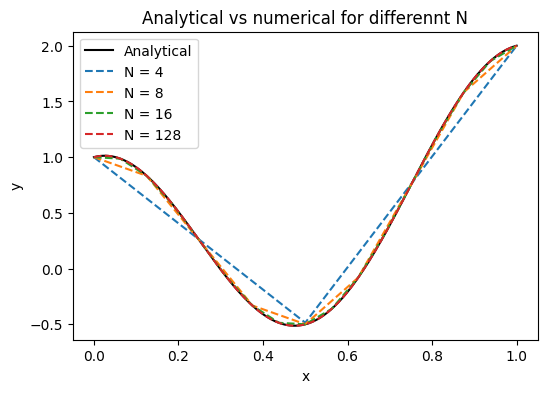

In [6]:
plt.figure(figsize = [6,4])
plt.plot(x_analytic, u_analytic(x_analytic), "-", color='black')
legend = ["Analytical"]

for i,N in enumerate(N_list):
    x = np.linspace(0,1,N+1)
    # Assemble A and b
    A = AssembleStiffnessMatrix1D(x)
    b = AssembleLoadVector1D(x, f, g_N, g_R)
    
    # Solve to find num. solution
    u_h = la.solve(A,b)

    # Plot
    plt.plot(x, u_h, "--")
    legend.append(f"N = {N}")
    
plt.legend(legend)
plt.title("Analytical vs numerical for differennt N")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [7]:
## d) functions
def energy_norm_exact(u, u_prim_2):
    x = np.linspace(0, 1, 1001)
    #Calc Energy norm for exact solution
    u_norm = (u(1))**2
    for i in range(0, x.size-1):
        # Using Simpsons
        h = x[i+1] - x[i]
        xm = (x[i+1] + x[i])/2
        u_norm += h/6*(u_prim_2(x[i]) + 4*u_prim_2(xm) + u_prim_2(x[i+1]))

    return u_norm

def error_energy_norm(u_norm, u_h, A):
    u_h_norm = u_h @ A @ u_h
    return np.sqrt(np.abs(u_norm - u_h_norm))

def error_max_norm(u_h, u, x):
    j = 0
    max_norm = 0
    for i in range(0,x.size-1):
        h = x[i+1] - x[i]
        x_step = np.linspace(x[i], x[i+1], 10)
        for j in range(10):
            u_h_func = u_h[i]*(x[i+1] - x_step[j])/h + u_h[i+1]*(x_step[j] - x[i])/h
            if max_norm < np.abs(u(x_step[j]) - u_h_func):
                max_norm = np.abs(u(x_step[j]) - u_h_func)
            
    return max_norm

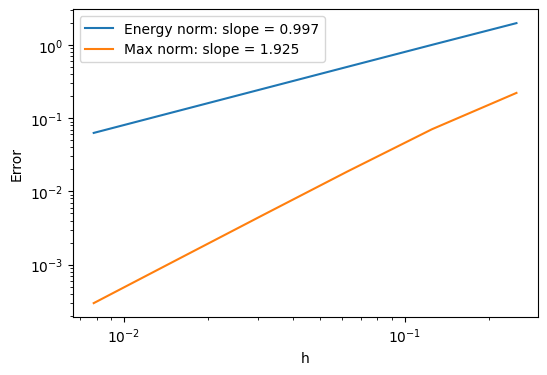

In [8]:
## d) "main" code
# Calculating the exact energy norm:
u_analytic = lambda x: x + np.cos(2*np.pi*x)
u_prim_2 = lambda x: (1 - 2*np.pi*np.sin(2*np.pi*x))**2
u_Enorm = energy_norm_exact(u_analytic, u_prim_2)

# Variables and initializations
N_list = [4, 8, 16, 32, 64, 128]
h = np.zeros(len(N_list))
for i,N in enumerate(N_list):
    h[i] = 1/N
err_E = np.zeros(len(N_list))
err_max = np.zeros(len(N_list))

# Calculating the error of the norms for different N:
for i,N in enumerate(N_list):
    x = np.linspace(0,1,N+1)

    A = AssembleStiffnessMatrix1D(x)
    b = AssembleLoadVector1D(x, f, g_N, g_R)
    u_h = la.solve(A,b)

    # Errors using max and energy norm
    err_E[i] = error_energy_norm(u_Enorm, u_h, A)
    err_max[i] = error_max_norm(u_h, u_analytic, x)

# Slope of error
q_E = np.polyfit(np.log(h), np.log(err_E), 1)[0]
q_max = np.polyfit(np.log(h), np.log(err_max), 1)[0]

# Plot result
plt.figure(figsize=[6,4])
plt.loglog(h, err_E)
plt.loglog(h, err_max)

plt.xlabel("h")
plt.ylabel("Error")
plt.legend([f"Energy norm: slope = {q_E:.03f}", f"Max norm: slope = {q_max:.3f}"])

plt.show()